## TELCO CHURN PREDICTION
### PART 1 (PREPROCESSING AND EXPLORATORY DATA ANALYSIS)
In this section, we focus on analyzing the behaviors of customers who have churned (marked as "Yes") and those who have stayed (marked as "No") in order to better understand factors that could improve customer retention. Here's a detailed breakdown of key features:

1. Target variable ('Churn'): This column indicates whether a customer has churned (Yes) or stayed (No) within the last month. The aim is to identify trends and behaviors related to churn, which helps improve retention efforts.

2. Service types: This includes information about the services a customer has subscribed to, such as phone, internet, online security, online backup, and tech support. By analyzing these, we can determine whether specific services are linked to higher retention or churn. For instance, customers with internet or online security services might show lower churn rates due to the higher perceived value of these services.

3. Customer account information: This section includes details about the customer's contract type (Monthly, One-Year, or Two-Year), payment method, paperless billing, monthly charges, and total charges. The goal here is to explore how these account characteristics influence churn. For example, customers on Monthly contracts may be more likely to churn, as they are not committed to a long-term relationship.

4. Customer demographics: In this dataset, the SeniorCitizen column was added to analyze the impact of age on customer churn. This logic classifies a customer as a senior citizen based on two factors: a tenure greater than 60 months and having dependents. Senior citizens may have different service preferences or levels of engagement compared to younger customers, which could affect their likelihood to churn. For example, older customers might be less engaged with services and could require different types of support. Understanding this demographic helps tailor retention strategies, such as offering specialized support or simplified plans for older customers. The aim is to ensure better customer retention by addressing their unique needs and reducing churn rates.

LOADING THE LIBRARIES

Initial step for exploratory data analysis (EDA) and basic preprocessing. This includes tools for understanding data patterns, visualizing distributions, and checking for potential preprocessing needs such as missing values, outliers, and relationships between variables

In [262]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as ss
from scipy.stats import anderson, chi2_contingency

plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

LOAD DATA

In [263]:
filepath = 'C:/Users/acer/Downloads/data_telco_customer_churn.csv'
df = pd.read_csv(filepath)

In [264]:
df.head().T

,0,1,2,3,4
Dependents,Yes,No,No,No,No
tenure,9,14,64,72,3
OnlineSecurity,No,No,Yes,Yes,No internet service
OnlineBackup,No,Yes,No,Yes,No internet service
InternetService,DSL,Fiber optic,DSL,DSL,No
DeviceProtection,Yes,Yes,Yes,Yes,No internet service
TechSupport,Yes,No,Yes,Yes,No internet service
Contract,Month-to-month,Month-to-month,Two year,Two year,Month-to-month
PaperlessBilling,Yes,Yes,No,No,Yes
MonthlyCharges,72.9,82.65,47.85,69.65,23.6


In [265]:
#Showing last 5 lines
df.tail().T

,4925,4926,4927,4928,4929
Dependents,No,Yes,No,No,Yes
tenure,15,10,58,1,4
OnlineSecurity,No,No,No internet service,No,No internet service
OnlineBackup,No,No,No internet service,No,No internet service
InternetService,Fiber optic,Fiber optic,No,Fiber optic,No
DeviceProtection,Yes,Yes,No internet service,No,No internet service
TechSupport,Yes,Yes,No internet service,No,No internet service
Contract,Month-to-month,Month-to-month,Two year,Month-to-month,Month-to-month
PaperlessBilling,Yes,Yes,No,Yes,No
MonthlyCharges,103.45,91.1,20.75,69.75,20.4


The data is loaded and checked the top and bottom rows. There a column names look different from others. Let’s fix it to make it the same.

## DATA PREPARATION

DATA CLEANING

In [266]:
#To rename always uses argument in dictionary
df = df.rename(columns= {'tenure' : 'Tenure'}) 

After renaming the columns, it needs to check the data's information to understand it better. It's important to carefully look at the data types and make sure they match the column names.

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Dependents        4930 non-null   object 
 1   Tenure            4930 non-null   int64  
 2   OnlineSecurity    4930 non-null   object 
 3   OnlineBackup      4930 non-null   object 
 4   InternetService   4930 non-null   object 
 5   DeviceProtection  4930 non-null   object 
 6   TechSupport       4930 non-null   object 
 7   Contract          4930 non-null   object 
 8   PaperlessBilling  4930 non-null   object 
 9   MonthlyCharges    4930 non-null   float64
 10  Churn             4930 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 423.8+ KB


From the data info, all data types are correct. Now, let’s check the data description to see more details about the features. The earlier issue will be fixed in the preprocessing step

In [268]:
df.describe(include='all').T
# .T to change in to horizontal so, we can read the data easier

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Dependents,4930,2,No,3446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tenure,4930.0,NaN,NaN,NaN,32.401217,24.501193,0.0,9.0,29.0,55.0,72.0
OnlineSecurity,4930,3,No,2445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,4930,3,No,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,4930,3,Fiber optic,2172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DeviceProtection,4930,3,No,2186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TechSupport,4930,3,No,2467,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Contract,4930,3,Month-to-month,2721,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PaperlessBilling,4930,2,Yes,2957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthlyCharges,4930.0,NaN,NaN,NaN,64.883032,29.92396,18.8,37.05,70.35,89.85,118.65


We can see if NaN values appear because certain statistics, like mean or st.dev, are not applicable to categorical columns. 
This doesn't affect the analysis, as it only applies to non-numeric data. Now we want to check the unique sample and the null percentage

In [269]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfdesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfdesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Dependents,object,0,0.0,2,"[No, Yes]"
1,Tenure,int64,0,0.0,73,"[66, 9]"
2,OnlineSecurity,object,0,0.0,3,"[Yes, No internet service]"
3,OnlineBackup,object,0,0.0,3,"[No internet service, Yes]"
4,InternetService,object,0,0.0,3,"[Fiber optic, No]"
5,DeviceProtection,object,0,0.0,3,"[No internet service, No]"
6,TechSupport,object,0,0.0,3,"[No internet service, Yes]"
7,Contract,object,0,0.0,3,"[Month-to-month, Two year]"
8,PaperlessBilling,object,0,0.0,2,"[Yes, No]"
9,MonthlyCharges,float64,0,0.0,1422,"[59.65, 54.65]"


We will remove rows with 'No Internet Service' in multiple columns to focus on internet users only, as these rows likely represent TV or phone-only customers. Additionally, rows with 'No Internet Service' but non-zero MonthlyCharges may indicate data errors or missing logic and will be fixed during preprocessing.

In [270]:
# Define the columns where you want to check for 'No internet service'
columns_to_check = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

# Create a condition that matches rows where any of the specifiC columns are 'No internet service'
condition = np.any([df[column] == 'No internet service' for column in columns_to_check], axis=0)

# Then drop these rows from the DataFrame
df = df.drop(df[condition].index)

In [271]:
df.head().T

,0,1,2,3,5
Dependents,Yes,No,No,No,Yes
Tenure,9,14,64,72,40
OnlineSecurity,No,No,Yes,Yes,No
OnlineBackup,No,Yes,No,Yes,No
InternetService,DSL,Fiber optic,DSL,DSL,DSL
DeviceProtection,Yes,Yes,Yes,Yes,Yes
TechSupport,Yes,No,Yes,Yes,No
Contract,Month-to-month,Month-to-month,Two year,Two year,Month-to-month
PaperlessBilling,Yes,Yes,No,No,Yes
MonthlyCharges,72.9,82.65,47.85,69.65,74.55


Now, we're gonna change "Month-to-month" in contract column in to monthly, to make the informartion more clearly

In [272]:
df['Contract'] = df['Contract'].replace('Month-to-month', 'Monthly')

In [273]:
print(df['Contract'].unique())

['Monthly' 'Two year' 'One year']


Now we're gonna add The "SeniorCitizen" column which is based on two variables, "Tenure" and "Dependents". Why? Here we make assumption if customers with a "Tenure" of more than 60 months and having "Dependents" are considered as "SeniorCitizen", while others are labeled as "No". This helps categorize customers based on their subscription duration and dependent status, which can make it easier to analyze customer behavior, including churn.  

Using Tenure and Dependents is that long-term customers (those with a high tenure) with dependents are often in a more stable phase of life, which might influence their loyalty to the company,and we make assumption our telecom company estabilized around 20 years.

In [274]:
df['SeniorCitizen'] = np.where((df['Tenure'] > 60) & (df['Dependents'] == 'Yes'), 'Yes', 'No')
print(df[['Tenure', 'Dependents', 'SeniorCitizen']].head())

   Tenure Dependents SeniorCitizen
0       9        Yes            No
1      14         No            No
2      64         No            No
3      72         No            No
5      40        Yes            No


In [275]:
print(df['SeniorCitizen'].unique())

['No' 'Yes']


Next is to creare the PaymentMethod column based on the PaperlessBilling variable to distinguish between offline and online payment methods. Customers with "No" in PaperlessBilling are grouped as using "Offline Payment," while those with "Yes" are grouped as using "Online Payment."

This helps analyze customer behavior, as new customers tend to use online payments and have a low tenure, while long-time customers often use offline payments and have a higher tenure. This categorization can provide insights into customer loyalty and show how payment methods relate to customer retention.

In [276]:
df['PaymentMethod'] = np.where(df['PaperlessBilling'] == 'Yes', 'Online Payment', 'Offline Payment')
print(df[['PaperlessBilling', 'PaymentMethod', 'Tenure']].head())

  PaperlessBilling    PaymentMethod  Tenure
0              Yes   Online Payment       9
1              Yes   Online Payment      14
2               No  Offline Payment      64
3               No  Offline Payment      72
5              Yes   Online Payment      40


## EDA (EXPLORATORY DATA ANALYSIS)

In this section, we'll begin by looking at the target variable, which is Churn. Next, we'll explore the features by dividing them into two categories: 1. qualitative (categorical) and 2. quantitative (numerical). Finally, we'll analyze how each feature contributes to the target variable, Churn, and see if we can identify any patterns in the data.

TARGET FEATURE

In [277]:
sns.set_style('darkgrid')

In [278]:
churn = df['Churn'].value_counts()[1]
no_churn = df['Churn'].value_counts()[0]

print(f'TOTAL CHURNED : {churn} |', f'TOTAL RETAINED : {no_churn}')

TOTAL CHURNED : 1234 | TOTAL RETAINED : 2644


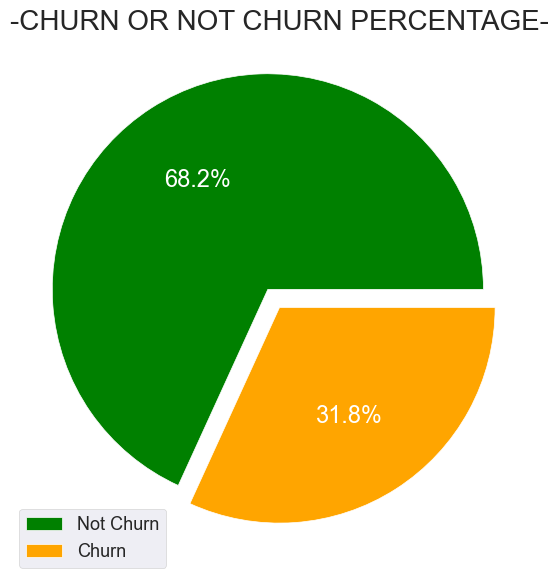

In [279]:
plt.figure(figsize = (8,7))
plt.title('-CHURN OR NOT CHURN PERCENTAGE-', fontsize = 20)

labels = 'Not Churn', 'Churn'

colors = ['green', 'orange']

plt.pie(df['Churn'].value_counts(), autopct = '%.1f%%', 
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0), colors=colors)

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

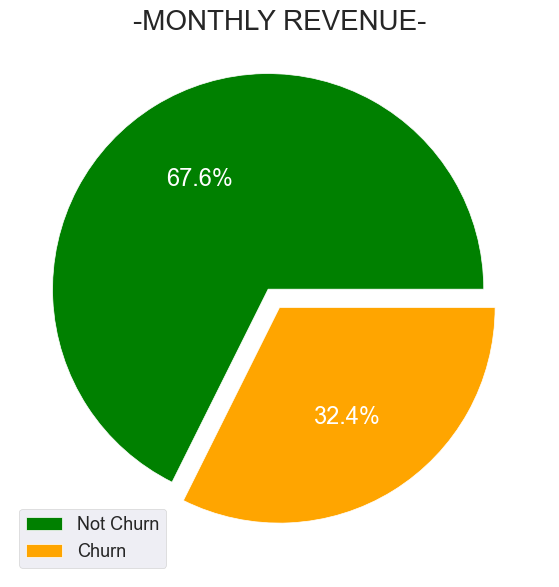

In [280]:
plt.figure(figsize = (8,7))
plt.title('-MONTHLY REVENUE-', fontsize = 20)

labels = 'Not Churn', 'Churn'

colors = ['green', 'orange']

plt.pie(df.groupby('Churn')['MonthlyCharges'].sum(), autopct = '%.1f%%', ## Percentage
        textprops = {'fontsize' : 17, 'color' : 'white'}, explode = (0.1,0), colors=colors)

plt.legend(labels, loc='lower left', fontsize = 13)

plt.show()

In [281]:
print(round(df.groupby('Churn')['MonthlyCharges'].sum()))

Churn
No     201369.0
Yes     96309.0
Name: MonthlyCharges, dtype: float64


In [282]:
monthly_revenue = df.groupby('Churn')['MonthlyCharges'].sum()

total_revenue = monthly_revenue.sum()
# Adding $ symbol
formatted_revenue = monthly_revenue.apply(lambda x: f"${x:,.2f}")

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Revenue by Churn Status:\n{formatted_revenue}")

Total Revenue: $297,678.20
Revenue by Churn Status:
Churn
No     $201,369.30
Yes     $96,308.90
Name: MonthlyCharges, dtype: object


Source of Average of telecom company : https://customergauge.com/blog/average-churn-rate-by-industry

The churn rate in this dataset is 31.8%, which is very close to the average churn rate in the telecommunications industry, usually around 31% (Average Churn of Telecommunications). This reflects the common challenges faced by telecom companies in retaining customers, including competition, pricing, and service quality.

When looking at the revenue, churned customers contribute 32.4% of the total monthly revenue, which is slightly higher than the churn rate itself. This suggests that the customers who leave might be high-value ones, and losing them could be costly for the business.

Out of the total revenue of 297,678.20 dollar, around 96,308.90 dollar comes from churned customers. This emphasizes the importance of retaining these valuable customers. A churn rate at this level is considered reasonable but signals that further efforts are necessary to maintain long-term customer loyalty. To address this, many telecom companies focus on improving customer experiences, offering personalized services, and creating loyalty programs to reduce churn and keep customers over the long term.

Now, let's continue exploring the data. I'll begin by dividing the features into two categories based on their data types. First, I'll look at the features with an object data type, and these will be categorized as discrete features

In [327]:
df_cat = df.loc[:, df.dtypes == 'object']  # Categorical columns (Ex: Payment Status, Churn Status, etc)
df_con = df.loc[:, df.dtypes != 'object']  # Continuous columns (Ex: Monthly Charges, Tenure, etc.)

In [284]:
df_cat.head()

,Dependents,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,Churn,SeniorCitizen,PaymentMethod
0,Yes,No,No,DSL,Yes,Yes,Monthly,Yes,Yes,No,Online Payment
1,No,No,Yes,Fiber optic,Yes,No,Monthly,Yes,No,No,Online Payment
2,No,Yes,No,DSL,Yes,Yes,Two year,No,Yes,No,Offline Payment
3,No,Yes,Yes,DSL,Yes,Yes,Two year,No,No,No,Offline Payment
5,Yes,No,No,DSL,Yes,No,Monthly,Yes,No,No,Online Payment


In [285]:
df_con.head()

,Tenure,MonthlyCharges
0,9,72.90
1,14,82.65
2,64,47.85
3,72,69.65
5,40,74.55


## 1. CATEGORICAL FEATURES

Cramér's V measures the strength of the relationship between two categorical variables. It ranges from 0 (no relationship) to 1 (strong relationship). Cant use pearson because its categorical data.
The cramersv function calculates this value using a confusion matrix and chi-square test. It is useful for finding correlations between categorical features.

In [286]:
# Cramers'v for categorical feature correlation

def cramersv(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [287]:
# Correlation between categorical features

corr = []
for i in df_cat.columns:
    matrix = []
    for j in df_cat.columns:
        matrix.append(cramersv(df_cat[i], df_cat[j]))
    corr.append(matrix)

corr_cat = pd.DataFrame(corr, index=df_cat.columns, columns=df_cat.columns)


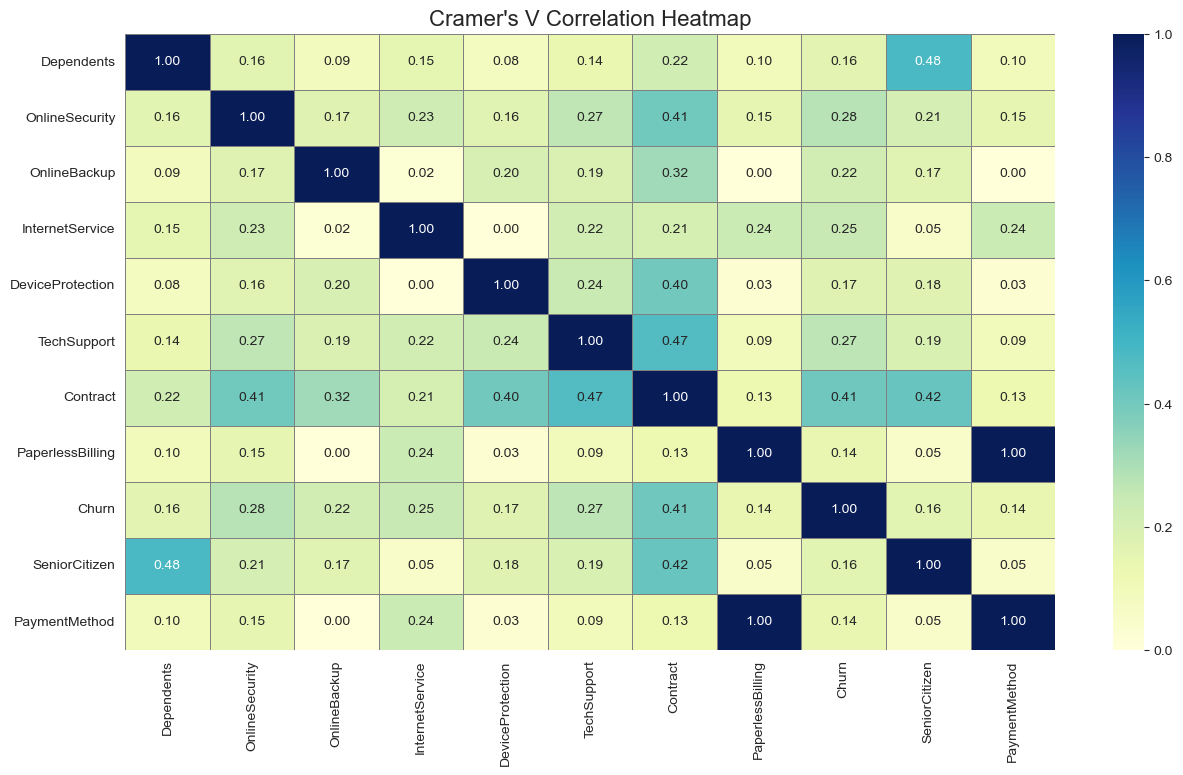

In [288]:
# Plotting the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr_cat,annot=True, cmap='YlGnBu', fmt=".2f",   
    linewidths=0.5,   # Line between heatmap
    linecolor='gray'  # line colour
)
plt.title("Cramer's V Correlation Heatmap", fontsize=16)  
plt.show()

As we can see, there are no features with extremely high correlations (above 0.7), indicating that multicollinearity is not a significant issue. However, we can do observe moderate correlations in some features, such as Contract with TechSupport (0.47) and OnlineSecurity (0.41). 

##### Why Analyze InternetService and OnlineSecurity?
In the heatmap, InternetService and OnlineSecurity have a moderate correlation of 0.23. Although it’s not very high, it still shows a relationship worth exploring. By analyzing these two features, we can understand how customers' choices for InternetService might relate to their decisions about OnlineSecurity. This could help identify patterns in customer behavior, even if the correlation isn’t extremely strong. 
To better understand their relationship with the target variable,I will explore a few of these correlations using pd.crosstab() beloW.

Normalization helps by converting the absolute values into percentages or proportions. This is useful because it allows us to compare categories fairly, even if the group sizes differ. In this case, normalization gives a clearer picture of how customers with different InternetService plans are choosing OnlineSecurity options, without being influenced by the overall number of customers.

In [289]:
pd.crosstab(df_cat['InternetService'], df_cat['OnlineSecurity'], normalize = True) #automatically normalizes the values to show proportions of the total dataset

OnlineSecurity,No,Yes
InternetService,,
DSL,0.222795,0.217122
Fiber optic,0.407684,0.152398


From the results, around 22% of customers using DSL do not have Online Security, while about 41% of Fiber Optic users have Online Security. Most customers with Online Security tend to choose DSL Internet Services. Around 21% of customers are not using either Online Security or Fiber Optic Internet Services.

In [290]:
pd.crosstab(df_cat['Contract'], df_cat['InternetService'], normalize = True)

InternetService,DSL,Fiber optic
Contract,,
Monthly,0.218669,0.389634
One year,0.106756,0.095152
Two year,0.114492,0.075297


From the results, around 22% of customers with a Monthly contract use DSL Internet Service, while 39% of Fiber optic users are on a Monthly contract. Customers with a One year contract have a smaller proportion in both categories, with 11% using DSL and 9% using Fiber optic. Finally, about 11% of DSL users and 7.5% of Fiber optic users are on a Two year contract.

This shows that DSL is more popular with Monthly and Two year contracts, while Fiber optic is mostly chosen by Monthly contract holders.

In [291]:
pd.crosstab(df_cat['SeniorCitizen'], df_cat['InternetService'], normalize = True)

InternetService,DSL,Fiber optic
SeniorCitizen,,
No,0.397112,0.522692
Yes,0.042806,0.037390


From the results, approximately 39.7% of customers using DSL are not senior citizens, compared to 4.3% who are senior citizens. For Fiber optic users, around 52.3% are not senior citizens, while only 3.7% are senior citizens.

This indicates that Fiber optic services are slightly more popular among non-senior citizens, whereas the usage of DSL is distributed more evenly between the two groups.

In [292]:
pd.crosstab(df_cat['SeniorCitizen'], df_cat['PaymentMethod'], normalize = True)

PaymentMethod,Offline Payment,Online Payment
SeniorCitizen,,
No,0.286230,0.633574
Yes,0.032491,0.047705


From the results, approximately 28.6% of customers who prefer Offline Payment are not Senior Citizens, while only 3.2% of Senior Citizens choose this payment method. For Online Payment, around 63.4% of non-Senior Citizens prefer this option, compared to 4.8% of Senior Citizens.

This suggests that non-Senior Citizens are more likely to use Online Payment methods, while Senior Citizens show a slightly higher preference for Offline Payment methods.

In [293]:
pd.crosstab(df_cat['SeniorCitizen'], df_cat['Contract'], normalize = True)

Contract,Monthly,One year,Two year
SeniorCitizen,,,
No,0.603920,0.184889,0.130995
Yes,0.004384,0.017019,0.058793


From the results, approximately 60% of non-senior citizens have a Monthly contract, compared to only 0.4% of senior citizens. For One-year contracts, the proportion of non-senior citizens is around 18%, while 1.7% of senior citizens fall into this category. Lastly, 13% of non-senior citizens have a Two-year contract, compared to 5.9% of senior citizens.

This indicates that non-senior citizens predominantly prefer Monthly contracts, while senior citizens show a slightly higher tendency to opt for longer-term contracts, such as Two-year contracts, compared to Monthly contracts.

In [294]:
pd.crosstab(df_cat['SeniorCitizen'], df_cat['PaperlessBilling'], normalize = True)

PaperlessBilling,No,Yes
SeniorCitizen,,
No,0.286230,0.633574
Yes,0.032491,0.047705


From the results, approximately 28.6% of customers who do not use Paperless Billing are non-senior citizens, compared to 63.4% of non-senior citizens who use Paperless Billing. Among senior citizens, 3.2% do not use Paperless Billing, while 4.8% opt for it.

This indicates that non-senior citizens are more likely to use Paperless Billing compared to senior citizens.

In [295]:
pd.crosstab(df_cat['DeviceProtection'], df_cat['OnlineBackup'], normalize = True)

OnlineBackup,No,Yes
DeviceProtection,,
No,0.364621,0.199072
Yes,0.195462,0.240846


From the results, approximately 36% of customers do not use both Online Backup and Device Protection, while 24% use both services. Around 20% of customers use Online Backup but not Device Protection, and 19% use Device Protection without Online Backup.

This indicates that a significant portion of customers do not utilize either service, while those who do tend to use both Online Backup and Device Protection together.

In [296]:
pd.crosstab(df_cat['TechSupport'], df_cat['InternetService'], normalize = True)

InternetService,DSL,Fiber optic
TechSupport,,
No,0.227695,0.408458
Yes,0.212223,0.151625


From the results, around 22.8% of customers with DSL Internet Service do not have Tech Support, compared to 40.8% of Fiber Optic users without Tech Support. On the other hand, approximately 21.2% of DSL users and 15.2% of Fiber Optic users have opted for Tech Support.

This indicates that a significant number of customers using Fiber Optic services tend to forgo Tech Support, while DSL users are slightly more likely to have Tech Support included in their plan.

In [297]:
pd.crosstab(df_cat['InternetService'], df_cat['Churn'], normalize=True)

Churn,No,Yes
InternetService,,
DSL,0.357916,0.082001
Fiber optic,0.323878,0.236204


From the results, approximately 35.8% of customers who do not churn use DSL Internet Service, while 8.2% of customers who churn also use DSL. On the other hand, 32.4% of non-churning customers use Fiber optic Internet Service, compared to 23.6% of customers who churn.

This indicates that DSL Internet Service is slightly more common among customers who do not churn, whereas Fiber optic is associated with a higher proportion of customers who churn.

In [298]:
pd.crosstab(df_cat['Contract'], df_cat['Churn'], normalize=True)


Churn,No,Yes
Contract,,
Monthly,0.323105,0.285199
One year,0.176122,0.025786
Two year,0.182568,0.007220


From the results, approximately 32% of customers with a Monthly contract did not churn, while 28.5% of them churned. Customers with a One-year contract showed a lower churn rate, with around 17.6% of them not churning and only 2.5% churning. Similarly, for customers with a Two-year contract, 18.3% did not churn, and only 0.7% churned.

This indicates that longer contract durations, such as One-year and Two-year contracts, are associated with lower churn rates, while Monthly contracts are linked to higher churn rates, possibly due to their flexibility.

In [299]:
pd.crosstab(df_cat['SeniorCitizen'], df_cat['Churn'], normalize=True)

Churn,No,Yes
SeniorCitizen,,
No,0.606498,0.313306
Yes,0.075297,0.004899


From the results, approximately 60.65% of non-Senior Citizen customers have not churned, while about 31.33% of non-Senior Citizen customers have churned. In comparison, only 7.53% of Senior Citizens have not churned, and a very small proportion, 0.49%, of Senior Citizens have churned.

This indicates that non-Senior Citizens are more likely to stay as customers compared to Senior Citizens, who represent a very small fraction of both the churned and non-churned customer base.

Next, we will examine the features Senior Citizen and Dependent, as they provide demographic information about the customers. Based on the findings, we will proceed with further analysis.

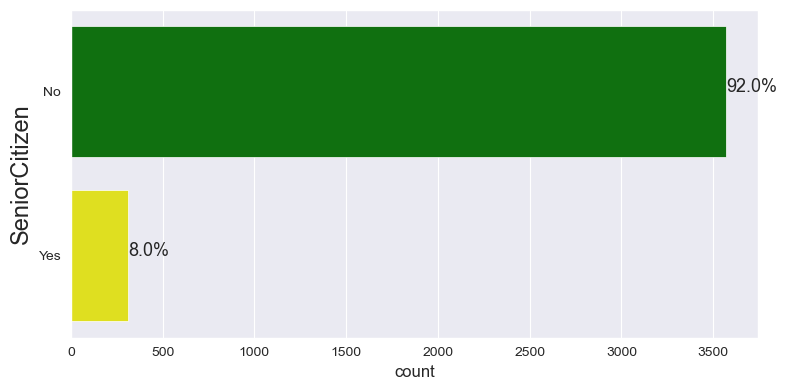

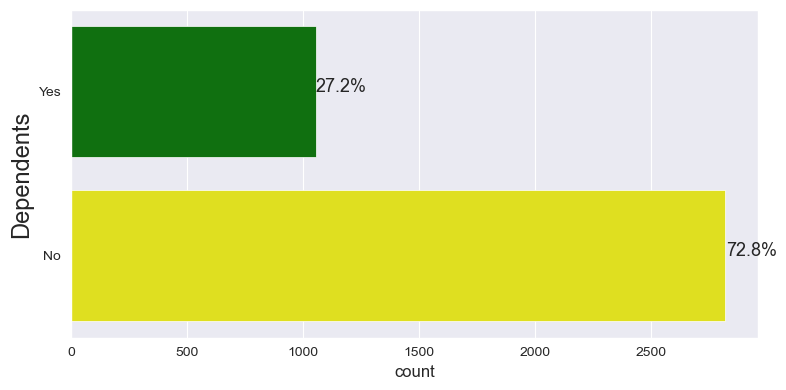

In [328]:
for col in ('SeniorCitizen', 'Dependents'):
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(y=col, data=df, palette=['green', 'yellow'])  # Warna hijau dan kuning
    
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.1f}%'.format(100 * val.get_width() / total)
        xpos = val.get_x() + val.get_width() + 1.5
        ypos = val.get_y() + val.get_height() / 2
        ax.annotate(pct, (xpos, ypos), fontsize=13)
    
    yes = df[col].value_counts()['Yes']
    no = df[col].value_counts()['No']
    
    plt.ylabel(col, fontsize=17)
    plt.tight_layout()
    plt.show()

From the above plots, we can see that only 8.0% of the customers are senior citizens, while 92.0% are not. A senior citizen is typically defined as someone aged 55 or older (source: https://www.seniorliving.org/life/senior-citizen/). This indicates that a vast majority of the customers (92.0%) are younger than 55, which is important for businesses when developing strategies that target a younger audience.

As for the "Dependents" feature, 27.2% of customers have dependents, while 72.8% do not. A dependent generally refers to someone, such as a child or relative, who relies on the customer for financial support (source: https://www.1040.com/tax-guide/taxes-for-families/who-can-you-claim/). This information can help businesses understand the family dynamics of their customer base, which may influence purchasing behavior.

In summary, these insights reveal that a large portion of the customers are likely younger than 55 and many do not have dependents. This information can be helpful for tailoring marketing campaigns, product offerings, and customer engagement strategies.

NEXT, LETS SEE HOW'S CUSTOMERS PREFER TO DO IN PAPERLESSBILLIGN OR PAPER BILLING

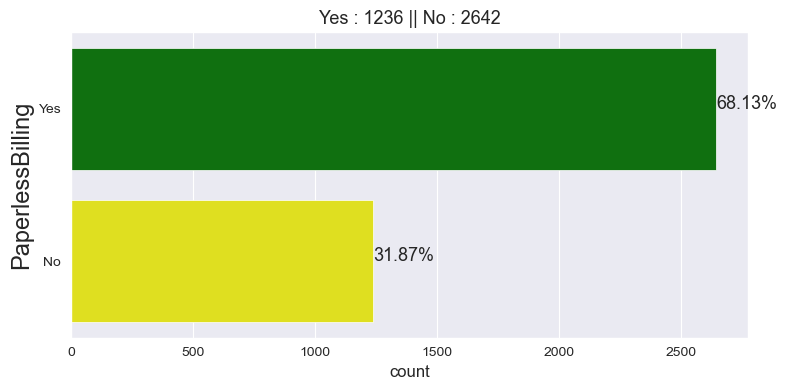

In [301]:
for col in ('PaperlessBilling',):  # Make sure it's a tuple with a single element
    plt.figure(figsize=(8,4))
    ax = sns.countplot(y=col, data=df, palette=['green', 'yellow'])
    
    total = len(df[col])
    
    for val in ax.patches:
        pct = '{:.2f}%'.format(100 * val.get_width() / total)
        xpos = val.get_x() + val.get_width() + 1.5
        ypos = val.get_y() + val.get_height() / 2 
        ax.annotate(pct, (xpos, ypos), fontsize=13)
    
    # Handling 'Yes' and 'No' values dynamically
    yes, no = df[col].value_counts().get(1, 0), df[col].value_counts().get(0, 0)
    
    plt.title(f'Yes : {yes} || No : {no}', fontsize=13)
    plt.ylabel(col, fontsize=17)
    plt.tight_layout()
    plt.show()


Based on the plot above, we can see that the majority of customers (68.13%) opt for paperless billing, while only 31.87% still prefer traditional paper bills. This shift towards digital billing not only aligns with customer preferences but can also help businesses reduce operational costs, promote eco-friendly practices, and stay competitive in a digital world.

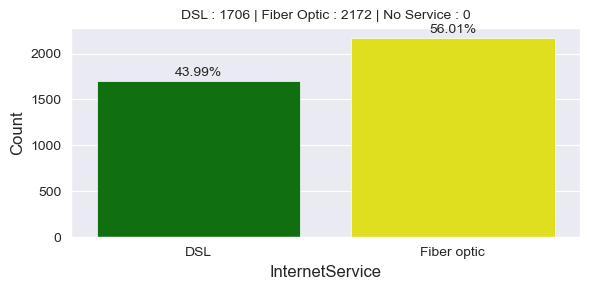

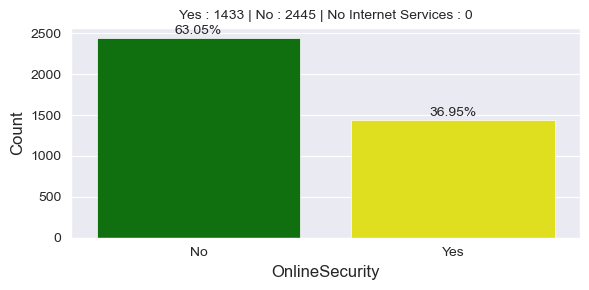

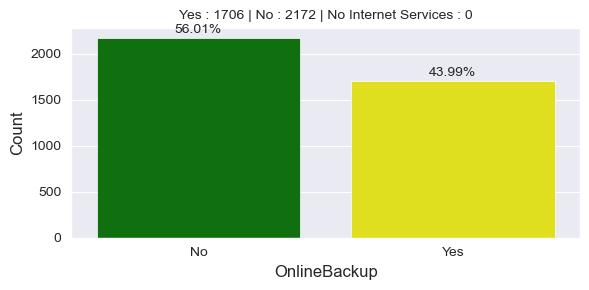

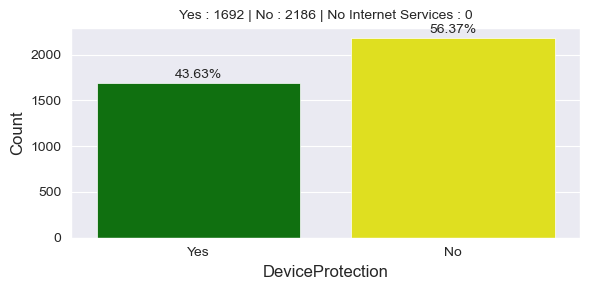

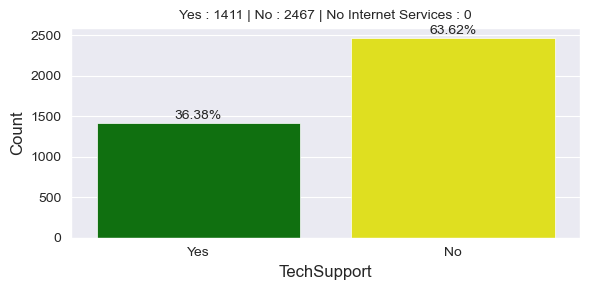

In [302]:
for col in ('InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'):
    plt.figure(figsize = (6,3))  # Smaller figure size
    ax  = sns.countplot(x= col, data = df, palette=['green', 'yellow', 'blue'])  # Vertical bar chart
    
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.2f}%'.format(100 * val.get_height()/total)  # Adjust to use height for percentage
        xpos = val.get_x() + val.get_width() / 2
        ypos = val.get_height() + 50  # Adjust vertical position of the annotation
        ax.annotate(pct, (xpos, ypos), fontsize = 10, ha='center')  # Smaller font size for annotations
        
    yes = df[col].value_counts()[1]
    no  = df[col].value_counts()[0]
    nos = df[col].value_counts().get(2, 0)  # Handles case if no 2 exists, avoids error
    
    if col == 'InternetService':
        plt.title(f'DSL : {yes} | Fiber Optic : {no} | No Service : {nos}', fontsize = 10)
    else:
        plt.title(f'Yes : {yes} | No : {no} | No Internet Services : {nos}', fontsize = 10)
        
    plt.xlabel(col, fontsize = 12)  # Smaller font size for xlabel
    plt.ylabel('Count', fontsize = 12)  # Smaller font size for ylabel
    plt.tight_layout()  # Adjust layout to fit everything
    plt.show()


From the plots above, we can see that most customers have internet service, with 56% choosing Fiber Optic and 44% using DSL. For additional services, only 29% of customers enabled Online Security, 43% chose Online Backup, 49% opted for Device Protection, and 38% activated Tech Support. This means that while many customers have internet service, the majority are not using the extra add-on services provided.

NEXT, LETS CONTINUE ABUT CUSTOMERS' ACC INFORMATION 

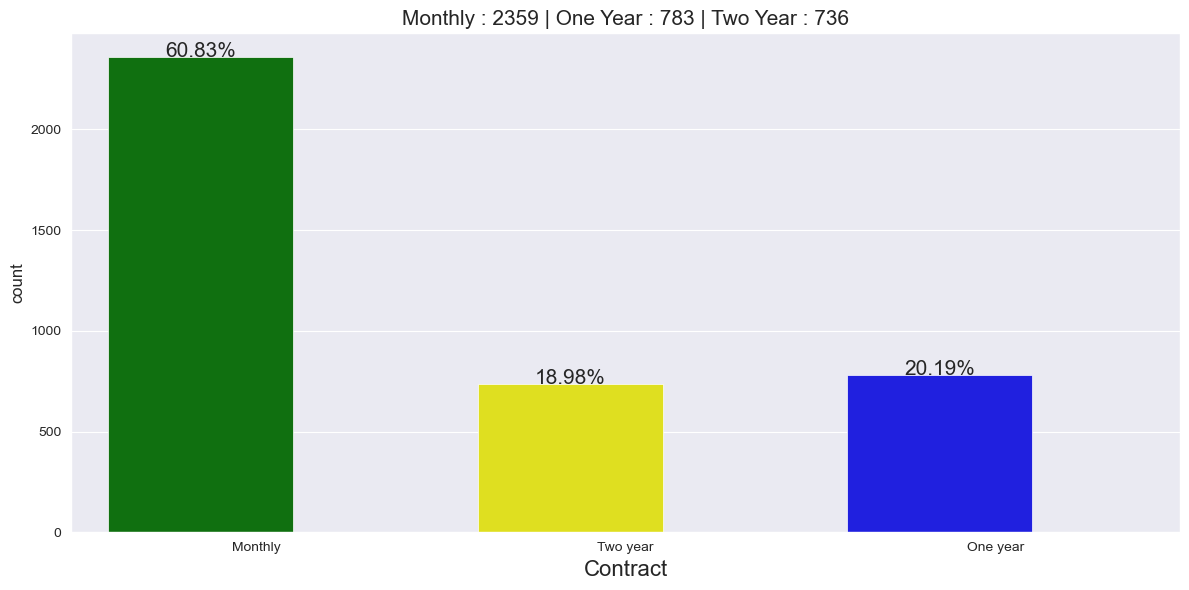

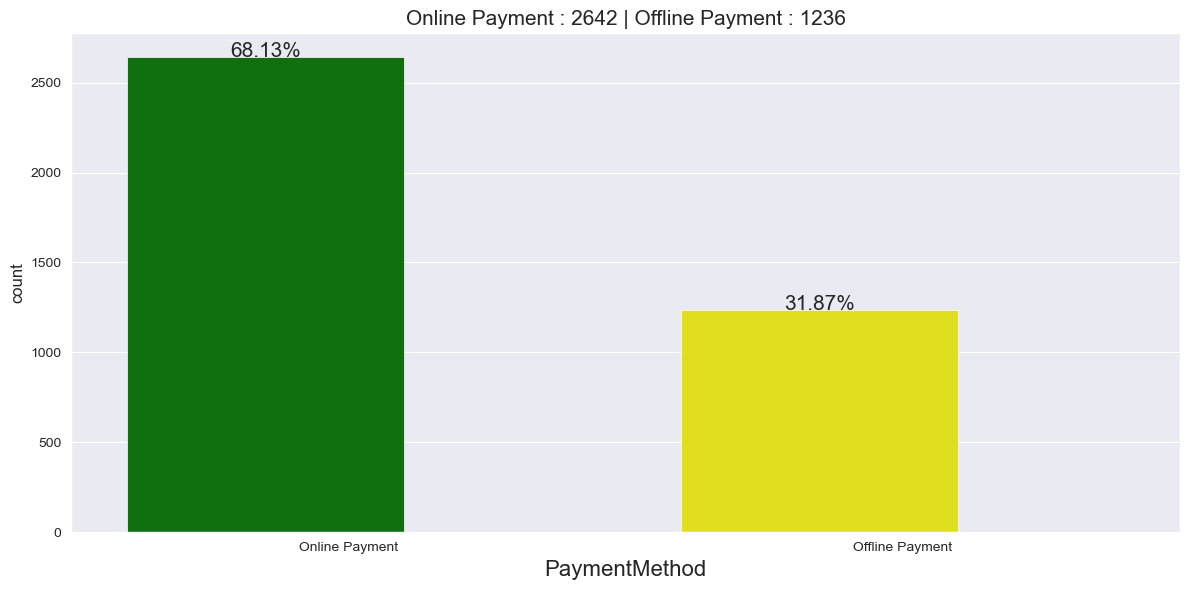

In [303]:
for col in ('Contract', 'PaymentMethod'):  # Loop through selected columns
    plt.figure(figsize=(12, 6))
    
    # Set custom colors for each column
    if col == 'Contract':
        palette_colors = ['green', 'yellow', 'blue']  # 3 colors for 'Contract'
    elif col == 'PaymentMethod':
        palette_colors = ['green', 'yellow', 'blue', 'red']  # 4 colors for 'PaymentMethod'
    
    ax = sns.countplot(x=col, data=df, palette=palette_colors)  # Plot the bar chart with colors

    # Reduce the bar width by adjusting patches
    for bar in ax.patches:
        bar.set_width(0.5)  # Reduce bar width (default is 0.8)

    total = len(df[col])  # Total number of rows in the column
    for val in ax.patches:  # Add percentage annotations
        pct = '{:.2f}%'.format(100 * val.get_height() / total)
        xpos = val.get_x() + val.get_width() / 2  # Center text in narrower bar
        ypos = val.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize=15, ha='center')

    # Dynamically get counts for categories, ensuring no out-of-bounds errors
    counts = df[col].value_counts()
    cat1 = counts.iloc[0] if len(counts) > 0 else 0
    cat2 = counts.iloc[1] if len(counts) > 1 else 0
    cat3 = counts.iloc[2] if len(counts) > 2 else 0
    cat4 = counts.iloc[3] if col == 'PaymentMethod' and len(counts) > 3 else 0

    # Set dynamic titles based on column
    if col == 'PaymentMethod':
        plt.title(f'Online Payment : {cat1} | Offline Payment : {cat2}', fontsize=15)
    else:
        plt.title(f'Monthly : {cat1} | One Year : {cat2} | Two Year : {cat3}', fontsize=15)


    # Update xlabel and ylabel with smaller fonts
    plt.xlabel(col, fontsize=16)
    plt.tight_layout()
    plt.show()

The bar graphs reveal key insights into customer behavior regarding contract types and payment methods. A large proportion, 60.83%, prefer Monthly contracts, likely due to the flexibility it offers. However, this flexibility comes with a higher churn risk, as customers can easily leave without a long-term commitment. In contrast, 20.19% and 18.98% of customers opt for One-Year and Two-Year contracts, indicating a more stable, long-term customer base that is likely more loyal and contributes to consistent revenue.

When it comes to payment methods, 68.13% of customers choose Online Payments, which shows a preference for convenience and automation. These customers are likely more committed and less likely to churn, as automated payments reduce friction. On the other hand, 31.87% of customers still prefer Offline Payments, suggesting they may have less trust in automated systems or prefer more control over their transactions.

These patterns align with industry insights, such as those from CFOClub (2023), which highlight how short-term contracts can lead to quicker feedback but also higher churn, while longer commitments foster loyalty and more predictable revenue.

Source : https://thecfoclub.com/metrics/reduce-customer-churn/

## 2. NUMERICAL FEATURES

Firstly, let's do checking the normality using anderson darling method, The Anderson-Darling test is chosen for normality testing because it is more sensitive to deviations from normality, especially in the tails of the distribution. This makes it useful for detecting outliers or extreme values that other tests might miss. It also performs well with small sample sizes and is considered a more powerful test than alternatives like the Kolmogorov-Smirnov test. However, for small datasets, the Shapiro-Wilk test is also a strong contender due to its robustness.

In [304]:
def normal(df):
    for col in df.columns:
        stat = anderson(df[col])[0]
        cval = anderson(df[col])[1][2]  # taking sign 5%
        if stat < cval:
            print('Normal distributed for ' + col)
        else:
            print('Not Normal distributed for ' + col)

#df_con is numeric variables
normal(df_con)

Not Normal distributed for Tenure
Not Normal distributed for MonthlyCharges


As the normality checking if the data is not noramlly distributed, so we decided to choose 'Spearman Rank Correlation'. Spearman Rank Correlation is used when the data is not normally distributed or when the relationship between variables is monotonic (not necessarily linear). Unlike Pearson's correlation, which assumes normality and linearity, Spearman works with ranks and can handle both ordinal and non-linear relationships. It's a good choice when you have skewed data or data with outliers.

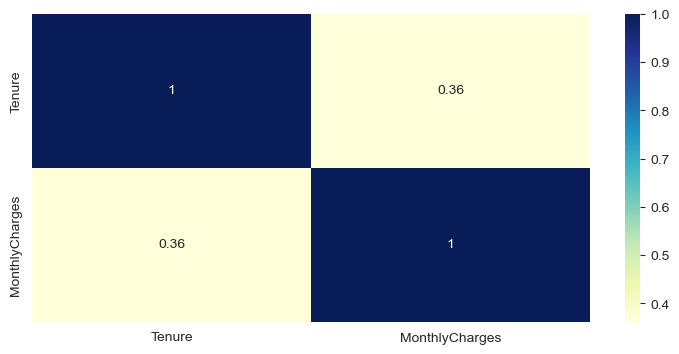

In [305]:
plt.figure(figsize = (9,4))
sns.heatmap(df_con.corr('spearman'), annot = True, cmap = 'YlGnBu') 
plt.show()

We can observe that the "Tenure" feature has a moderate positive correlation (0.36) with "Monthly Charges." This suggests that as tenure increases, monthly charges tend to rise slightly. However, the correlation isn't very strong, indicating that other factors may be influencing monthly charges. Further exploration of these relationships with visualizations like pairplots can help clarify the patterns more deeply.

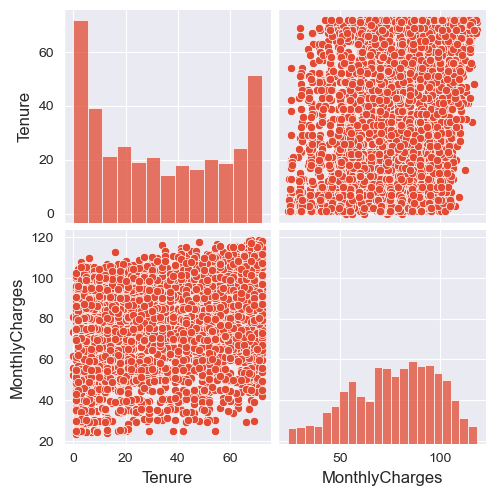

In [307]:
sns.pairplot(df_con)

The pairplot shows the relationship between "Tenure" and "MonthlyCharges." The scatterplot indicates no strong linear relationship between the two features, as the points are widely dispersed. "MonthlyCharges" seems fairly consistent across different "Tenure" values, with some clustering at certain points. The histograms reveal that "Tenure" is positively skewed, as most customers have shorter tenures, and there are a few with much longer tenures. Meanwhile, "MonthlyCharges" appears to have a slightly normal distribution, with the charges more evenly distributed across the customers.

It suggests that while there may not be a direct correlation between how long customers stay with the service and their monthly charges, there are trends in the distribution of these features that can help with understanding customer behavior and identifying areas for potential marketing or retention strategies.

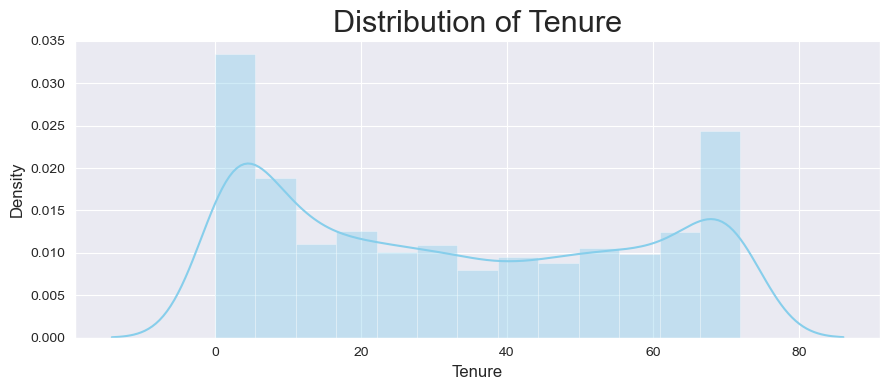

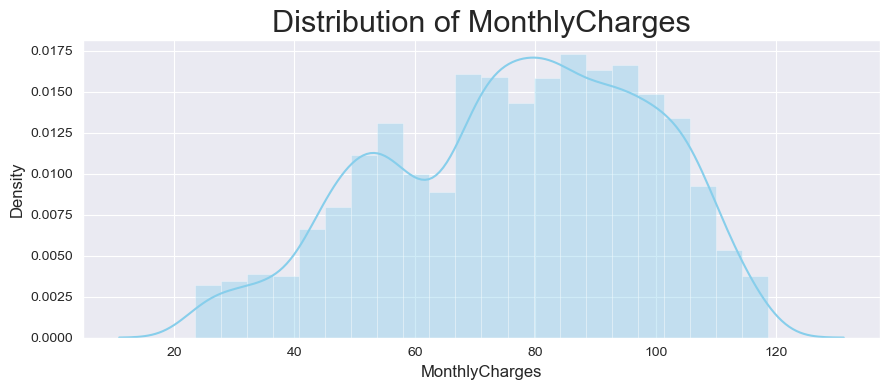

In [309]:
for col in df_con :
    plt.figure(figsize = (9,4))
    
    sns.distplot(df[col], color='skyblue') 
    plt.xlabel(col, fontsize = 12)
    plt.title('Distribution of ' + col, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

From the plots above, the tenure distribution shows that many customers are either very new or have been with the company for a long time, with fewer in between. For the monthly charges, most customers pay between 60 dollar - 100 dollar  per month, with fewer customers at the lower or higher ends of the range. This suggests that newer customers may be testing the service, while long-term customers are likely more satisfied or engaged. Additionally, the concentration of monthly charges around 60 dollar - 100 dollar highlights a key pricing range where most customers find value.

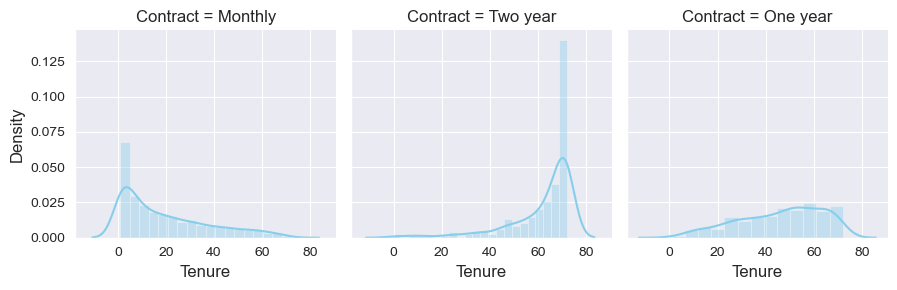

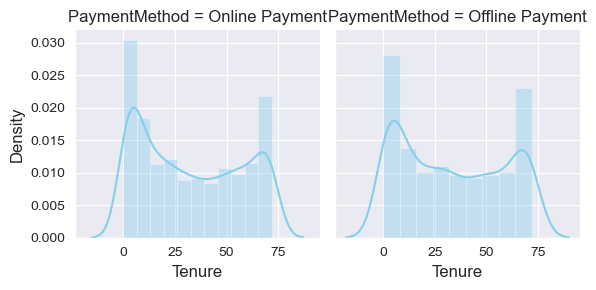

In [312]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(df, col=col).map(sns.distplot, 'Tenure', color='skyblue')

The Contract feature is chosen to analyze how different contract types (Month-to-Month, One-Year, Two-Year) impact customer behavior, especially in relation to tenure. This is important because contract type reflects the level of commitment a customer has to the service. For example, shorter contracts may indicate more flexibility but higher churn risk, while longer contracts often suggest stability and loyalty. By examining tenure distributions across these categories, we can better understand retention patterns and identify opportunities for improving customer retention.

From the graphs above, the tenure distribution by contract type shows that customers with monthly contracts tend to have lower tenures, indicating they are likely newer or less committed. In contrast, customers with one-year and two-year contracts have longer tenures, especially for two-year contracts where tenure peaks close to 80 months. This suggests that longer contract terms are associated with higher customer retention.

For the graphs below, the tenure distribution by payment method reveals that both online and offline payments have a significant number of customers with short tenures, suggesting newer customers. However, there is also a notable peak at higher tenure for both payment methods, indicating that some long-term customers prefer both payment options. To improve retention, businesses can encourage monthly contract users to switch to longer-term plans and offer incentives, such as discounts or loyalty rewards, to attract and retain customers, regardless of their payment method.

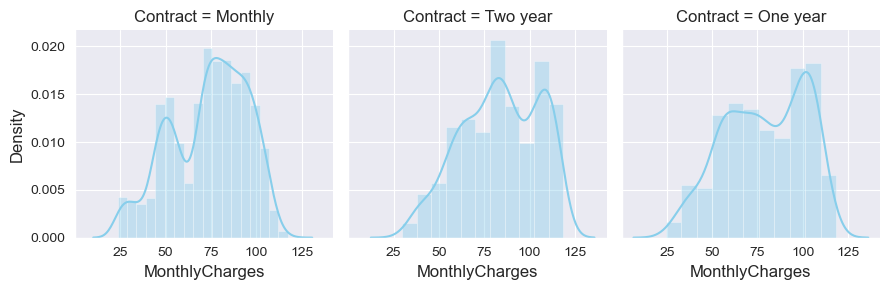

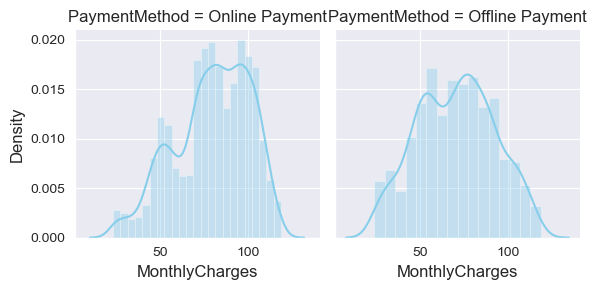

In [314]:
for col in ('Contract', 'PaymentMethod'):
    sns.FacetGrid(df, col = col).map(sns.distplot, 'MonthlyCharges', color='skyblue')

The Contract feature is chosen to examine how different contract types (Month-to-Month, One-Year, Two-Year) influence Monthly Charges. This analysis helps identify patterns in customer spending across contract durations. For instance, customers with longer contracts might receive discounted rates, while those on shorter contracts might pay higher charges for added flexibility. By analyzing these differences, we can better understand pricing strategies and their effects on customer retention and revenue generation.

The graphs above show the distribution of MonthlyCharges for different contract types. Customers with a Monthly contract tend to have lower charges, while Two-year and One-year contracts show higher MonthlyCharges overall. The density curve for Monthly contracts has multiple peaks, meaning more variation, while One-year and Two-year contracts show smoother and higher average charges.

Below: The graphs below compare MonthlyCharges for different payment methods. Online Payment shows a wider spread of charges, with more customers having higher charges compared to Offline Payment. For Offline Payment, most customers have mid-range MonthlyCharges, and the distribution is slightly smoother

## CATEGORICAL FEATURES TO TARGET VARIABLE "CRHUN"

This analysis aims to explore how categorical variables like Dependents, OnlineSecurity, OnlineBackup, InternetService, DeviceProtection, TechSupport, Contract, PaperlessBilling, and Churn relate to customer behavior. By visualizing the distribution of each feature against Churn, we can identify patterns or categories linked to higher churn rates. This helps uncover specific areas where customer retention strategies may be improved.

For example, when analyzing Contract against Churn, we might find that customers with Month-to-Month contracts have a higher churn rate compared to those on One-Year or Two-Year contracts. This suggests that shorter contracts are associated with less commitment and higher risk of leaving. Similarly, when looking at OnlineSecurity, customers without security services might show higher churn rates, indicating a potential opportunity to improve retention by promoting these services.

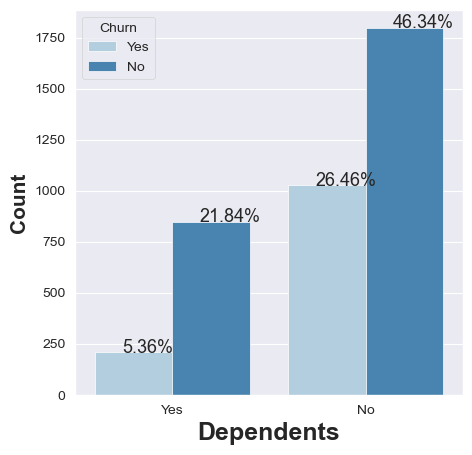

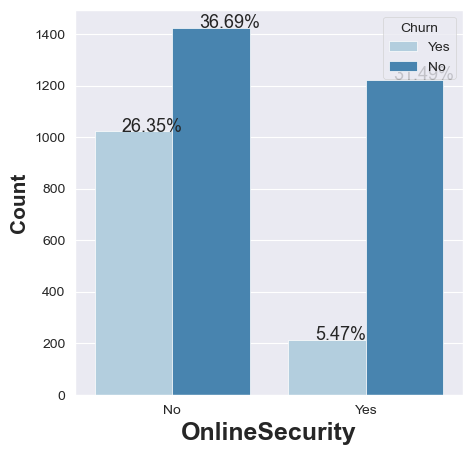

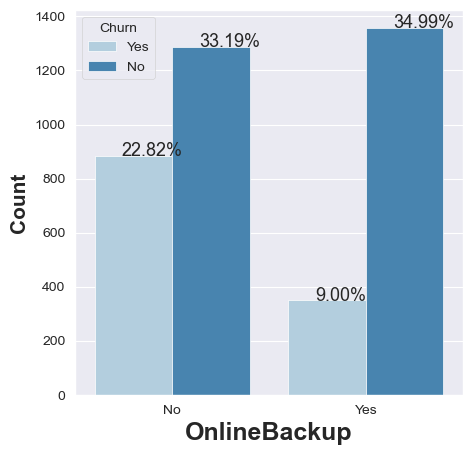

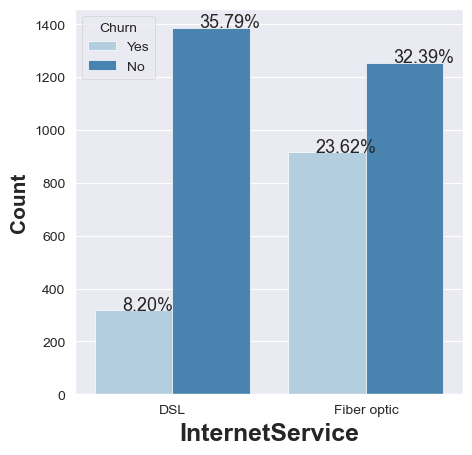

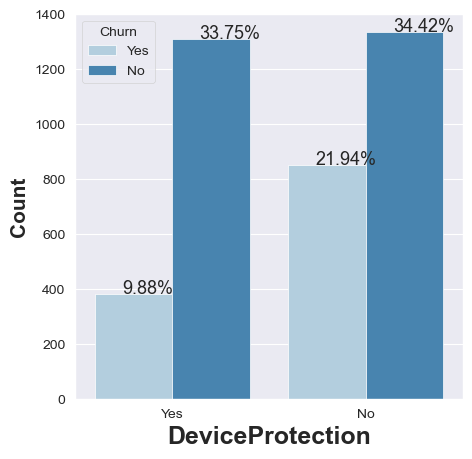

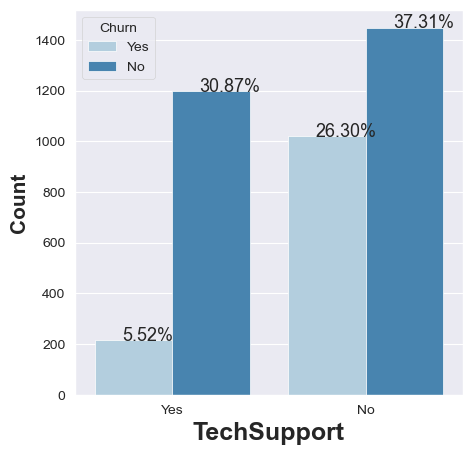

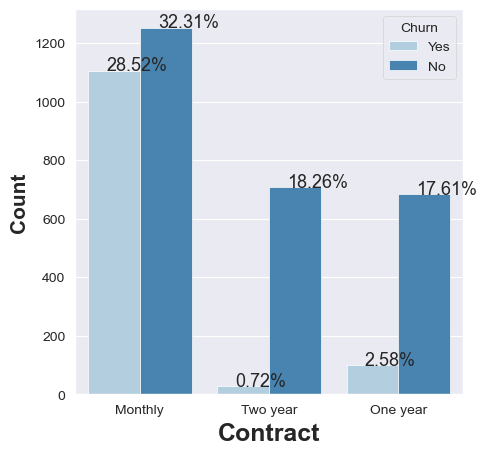

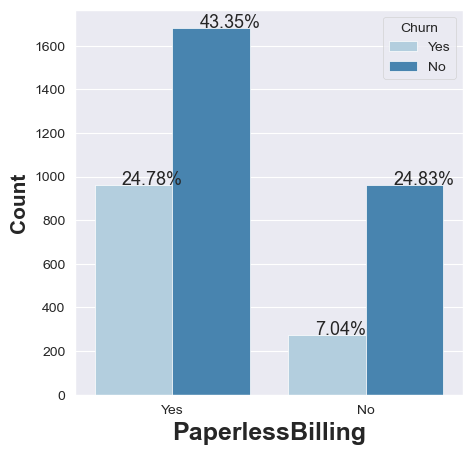

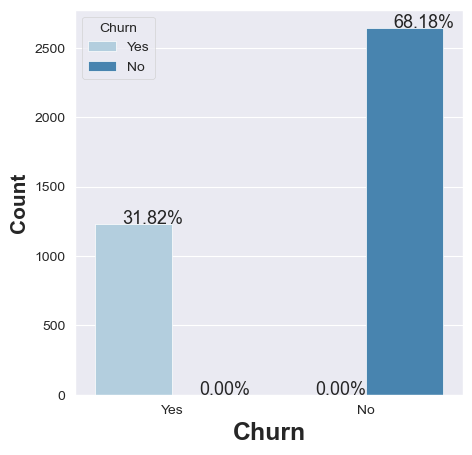

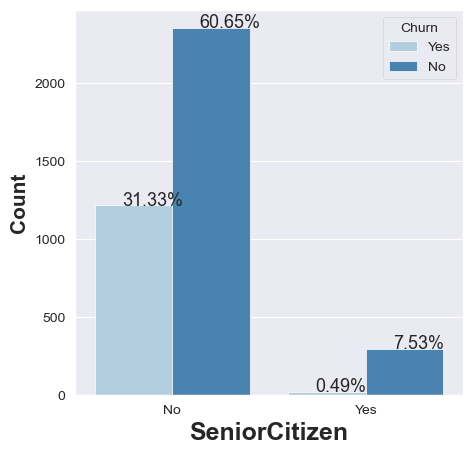

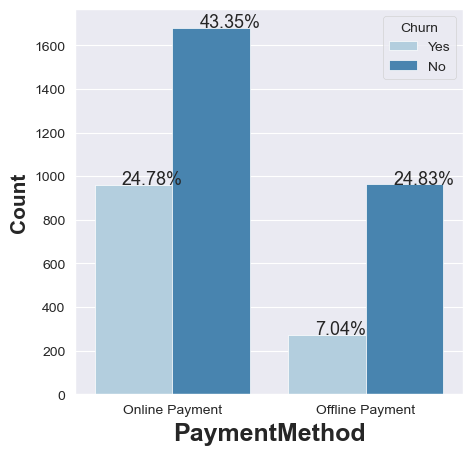

In [324]:
for col in df_cat:
    plt.figure(figsize=(5, 5))  # Adjusted figure size
    ax = sns.countplot(x=col, data=df, hue='Churn', palette='Blues')
    
    total = len(df[col])
    for val in ax.patches:
        pct = '{:.2f}%'.format(100 * val.get_height()/total)
        xpos = val.get_x() + 0.14
        ypos = val.get_height()
        ax.annotate(pct, (xpos, ypos), fontsize=13)
    
    plt.xlabel(col, fontsize=18, fontweight='bold')  # Adjusted font size and added bold
    plt.ylabel('Count', fontsize=15, fontweight='bold')  # Optional: adding a y-axis label
    plt.show()

The graphs display the differences in churned and not churned customers across multiple features. For Dependents, churned customers are mostly those without dependents, showing that having dependents might reduce churn. In OnlineSecurity and OnlineBackup, customers without these services have much higher churn rates, meaning that the absence of these protections could lead to more customer turnover.

For InternetService, customers using Fiber Optic experience the highest churn, while other internet types show lower churn. Similarly, in DeviceProtection and TechSupport, churned customers tend to not use these services, indicating their importance in customer retention.

When looking at Contract, churned customers are heavily concentrated in the Month-to-Month contract group, showing that shorter commitments are associated with higher churn. In PaperlessBilling, churned customers tend to opt for paperless billing more often. The SeniorCitizen feature shows a slight increase in churn among older customers, though the difference is less significant.

Finally, PaymentMethod highlights that churn is the highest for customers paying through Electronic Check, suggesting this group may need further attention.

From these observations, we can infer that features like no Online Security, no Online Backup, no Tech Support, Fiber Optic internet, Month-to-Month contracts, and Electronic Check payments strongly correlate with churn. These factors stand out and could help predict churned customers effectively, as they show clear differences compared to the non-churned group.

These patterns are particularly important for Machine Learning algorithms because features with clear differences, such as service usage, contract type, and payment method, can serve as strong predictors for customer churn. By identifying these high-risk customers, Machine Learning models can provide valuable insights to help reduce churn and improve retention strategies.

## NUMERICAL FEATURES TO TARGET "CHURN"
This analysis focuses on understanding how numerical features, specifically Tenure and MonthlyCharges, relate to customer churn. By examining the distribution of these features for customers who have churned versus those who have not, we can uncover patterns associated with higher churn rates. 

For example, it may be found that customers with shorter tenures or higher monthly charges are more likely to churn, indicating that customers who are newer or paying more are at higher risk. Understanding these relationships helps in identifying strategies to improve retention and reduce chur

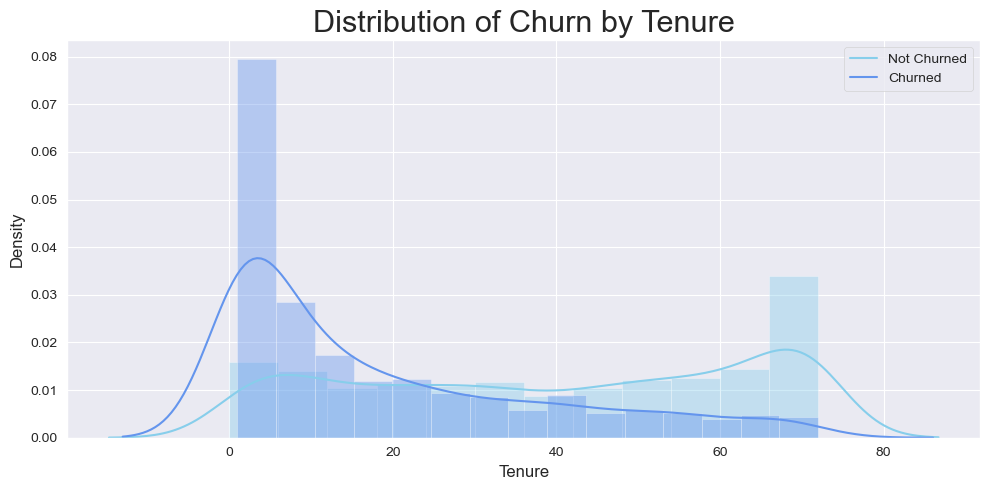

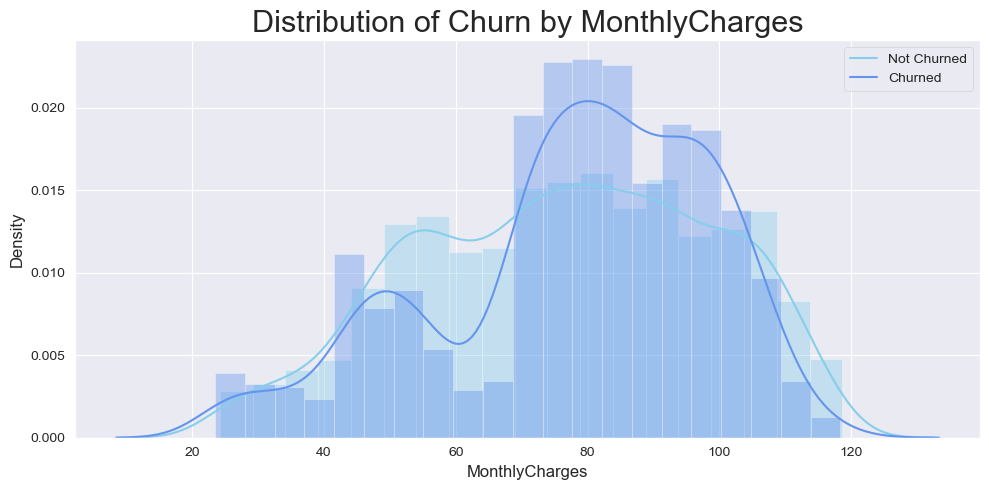

In [326]:
for col in df_con:
    plt.figure(figsize = (10,5))
    ax = sns.distplot(df[(df['Churn'] == 'No')][col], color='skyblue')
    ax = sns.distplot(df[(df['Churn'] == 'Yes')][col], color='cornflowerblue')
    
    ax.legend(['Not Churned', 'Churned'])
    
    plt.xlabel(col, fontsize = 12)
    plt.title('Distribution of Churn by ' + col, fontsize = 22)
    
    plt.tight_layout()
    plt.show()

The first graph shows the distribution of churn by tenure. Customers who churned mostly have a very short tenure (close to 0 months), while customers who stayed tend to have a longer tenure. This suggests that customers who leave the service often do so early in their relationship.

The second graph shows the distribution of churn by monthly charges. Customers who churned tend to have higher monthly charges compared to those who did not churn. This means that higher costs might be linked to a higher chance of leaving the service.

## CONCLUSION
In conclusion, based on the data exploration above, several observations can be made:

1. Service-related attributes such as Tenure, Contract, Paperless Billing, Monthly Charges, and Internet Service significantly influence customer churn. These features contribute notably to identifying customers who are more likely to churn.

2. the demographic analysis reveals that 8.0% of the customers are senior citizens, while 92.0% are younger than 55. Additionally, 27.2% of customers have dependents, and 72.8% do not. These insights indicate that most customers are likely younger, and a majority do not have dependents, which can help businesses tailor their strategies and offerings accordingly. 

3. Customers with Monthly contracts are more likely to churn compared to those with One-Year or Two-Year contracts. This indicates that shorter contract durations are associated with a higher risk of customer departure, potentially due to lower commitment or satisfaction.

4. Additionally, customers using Paperless Billing tend to have a higher churn rate than those not using it. This could suggest that customers who prefer digital communication may be less engaged with the service or more inclined to switch providers.

## EXPORTED CLEAN DATA TO CSV

In [330]:
df_clean = df.copy()

In [334]:
df_clean.head()

,Dependents,Tenure,OnlineSecurity,OnlineBackup,InternetService,DeviceProtection,TechSupport,Contract,PaperlessBilling,MonthlyCharges,Churn,SeniorCitizen,PaymentMethod
0,Yes,9,No,No,DSL,Yes,Yes,Monthly,Yes,72.90,Yes,No,Online Payment
1,No,14,No,Yes,Fiber optic,Yes,No,Monthly,Yes,82.65,No,No,Online Payment
2,No,64,Yes,No,DSL,Yes,Yes,Two year,No,47.85,Yes,No,Offline Payment
3,No,72,Yes,Yes,DSL,Yes,Yes,Two year,No,69.65,No,No,Offline Payment
5,Yes,40,No,No,DSL,Yes,No,Monthly,Yes,74.55,No,No,Online Payment


In [336]:
df_clean.to_csv('Telco_Customer_Churn_Cleaned_Data.csv', index = False)

In [337]:
import os
print(os.getcwd())  # Displays the current working directory

C:\Users\acer\Purwadika
